## 回家作業

### 資料位於
- https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/Churn_Modelling.csv

|編號|題目|提示|
|----|----------|----|
|1.|使用Pandas 將資料讀取到一名為 df 的 DataFrame 中?|提示：使用 read_csv| 
|2.|請表列出該資料集的綱要(schema) ? |提示：使用 info| 
|3.|請表列出該資料集的敘述性統計 ? |提示：使用 describe|
|4.|請用列出資料型態為字串的欄位 ? |提示：dtypes: object|
|5.|請將特徵資料命名為 X , 目標(Exited) 資料命名為 Y?|提示：iloc| 
|6.|請使用邏輯式回歸(Logistic Regression) 針對特徵與目標建立一分類模型? |提示：ensemble|
|7.|繼第6題,請計算出模型準確度(Accuracy)?|提示：accuracy|
|8.|繼第6題,請計算出混淆矩陣(Confusion Matrix)? |提示：confusion_matrix|
|9.|請使用隨機森林(Random Forest) 針對特徵與目標建立一分類模型? |提示：ensemble|
|10.|請比較隨機森林與邏輯式迴歸三模型的AUC ? |提示：auc|

### 答案一

In [1]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/Churn_Modelling.csv')

In [2]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 答案二

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### 答案三

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### 答案四

In [7]:
df.dtypes[df.dtypes == 'object']

Surname      object
Geography    object
Gender       object
dtype: object

In [9]:
df.select_dtypes('object').head()

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female


### 答案五

In [11]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
geo = pandas.get_dummies(df['Geography'])
del geo['France']

In [14]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [16]:
gender = pandas.get_dummies(df['Gender'])
del gender['Female']

In [17]:
dataset = pandas.concat([df, geo, gender], axis = 1)

In [18]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [19]:
dataset = dataset.iloc[:,3:]

In [21]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [22]:
dataset.drop(['Geography', 'Gender'], axis = 1, inplace=True)

In [23]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [25]:
dataset.columns 

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Germany', 'Spain',
       'Male'],
      dtype='object')

In [26]:
X = dataset[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Germany', 'Spain',
       'Male']]
Y = dataset['Exited'].values

### 答案六

In [30]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X,Y, test_size = 0.33, random_state = 42)

In [31]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(trainX,trainY)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
predicted = clf.predict(testX)

### 答案七

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(testY,predicted)

0.7996969696969697

### 答案八

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(testY,predicted)

array([[2579,   78],
       [ 583,   60]], dtype=int64)

### 答案九

In [37]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(trainX, trainY)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
predicted = clf.predict(testX)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(testY,predicted)

0.8703030303030304

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(testY,predicted)

array([[2561,   96],
       [ 332,  311]], dtype=int64)

### 答案十

In [42]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier



clf1 = RandomForestClassifier(n_estimators=100, criterion="entropy")
clf1.fit(trainX, trainY)

clf2 = LogisticRegression()
clf2.fit(trainX, trainY)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


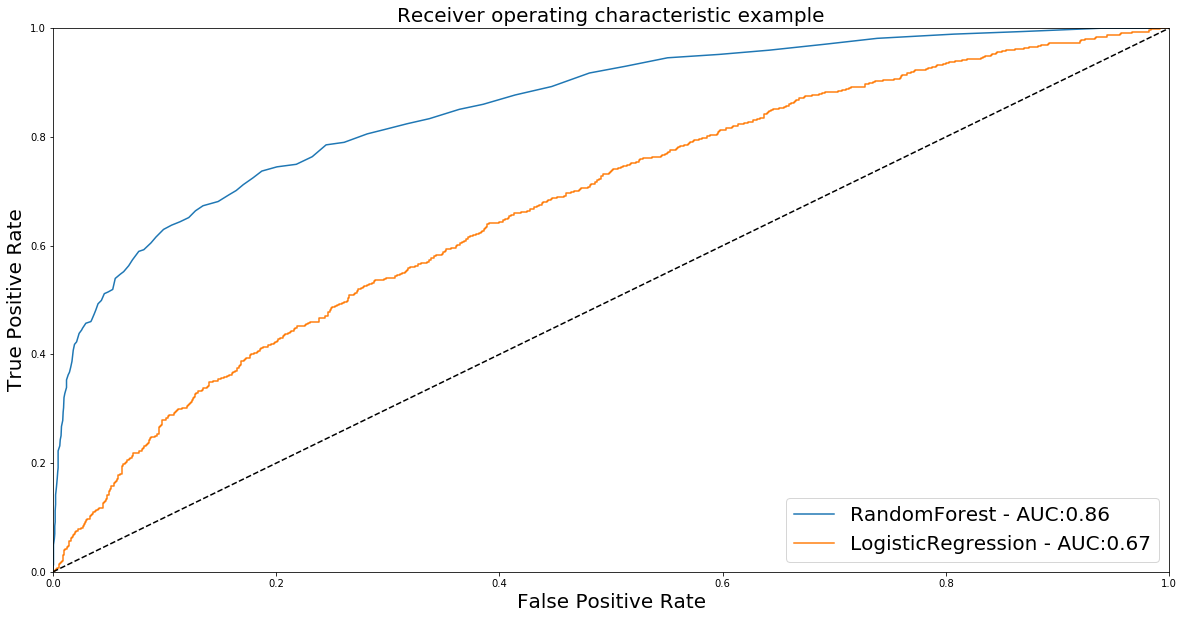

In [45]:
from sklearn.metrics import roc_curve, auc
from matplotlib  import pyplot as plt
plt.figure(figsize= [20,10])
for clf, title in zip([clf1,clf2], [ 'RandomForest', 'LogisticRegression']):
    probas_ = clf.fit(trainX, trainY).predict_proba(testX)
    fpr, tpr, thresholds = roc_curve(testY, probas_[:, 1])
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()

## 英文斷詞

In [46]:
a = 'this is a book'
a.split()

['this', 'is', 'a', 'book']

## 中文斷詞

In [47]:
! pip install jieba

In [48]:
import jieba
seg_list = jieba.cut('酸民婉君也可以報名嗎?')

In [49]:
list(seg_list)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 1.002 seconds.
Prefix dict has been built succesfully.


['酸民婉君', '也', '可以', '報名', '嗎', '?']